In [38]:
#import packages and classes
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM #class for LSTM training
import os
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from math import sqrt
from keras.layers import Activation, Flatten
from keras.layers import Conv2D #class for CNN
from keras.layers import  MaxPooling2D
from sklearn import svm #SVM class
from sklearn.model_selection import GridSearchCV #grid class for tuning each algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge #bayesian algorithm
from sklearn.tree import DecisionTreeRegressor

In [39]:
#loading and displaying dataset values
dataset = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
dataset

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0         NaN  288.28      0.0      0.0          40        Clouds   
1         NaN  289.36      0.0      0.0          75        Clouds   
2         NaN  289.58      0.0      0.0          90        Clouds   
3         NaN  290.13      0.0      0.0          90        Clouds   
4         NaN  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199     NaN  283.45      0.0      0.0          75        Clouds   
48200     NaN  282.76      0.0      0.0          90        Clouds   
48201     NaN  282.73      0.0      0.0          90  Thunderstorm   
48202     NaN  282.09      0.0      0.0          90        Clouds   
48203     NaN  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  2012-10-02 10:00:00            4516  
2             overcast clouds  2012-10-02 11:00:00            4767  
3             overcast clouds  2012-10-02 12:00:00            5026  
4               broken clouds  2012-10-02 13:00:00            4918  
...                       ...                  ...             ...  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  

[48204 rows x 9 columns]

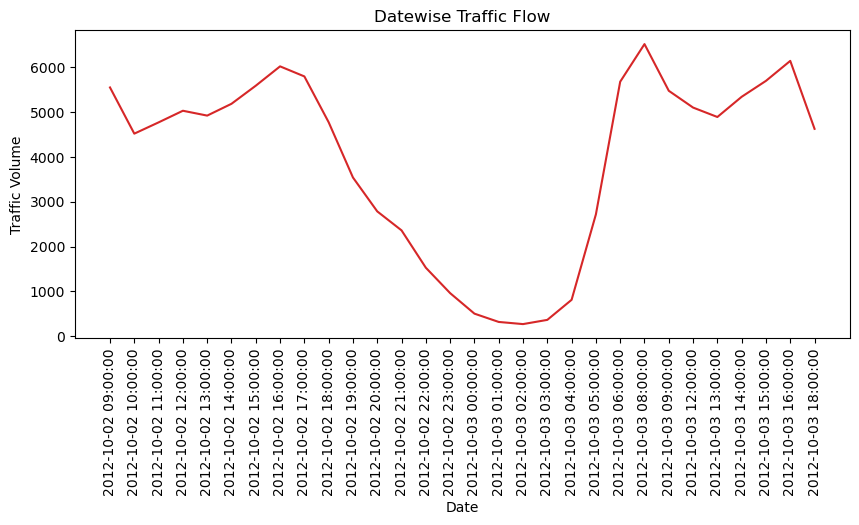

In [41]:
#plotting graph of traffic flow in different dates
plt.figure(figsize=(10,4), dpi=100)
plt.plot(dataset.date_time[0:30], dataset.traffic_volume[0:30], color='tab:red')
plt.gca().set(title="Datewise Traffic Flow", xlabel='Date', ylabel="Traffic Volume")
plt.xticks(rotation=90)
plt.show()

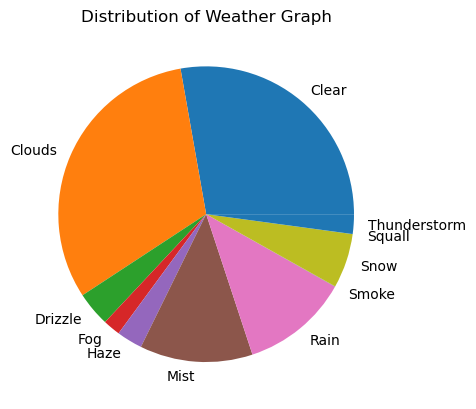

In [42]:
#graphs of different weather condition found in dataset
weather = dataset['weather_main'].ravel() #extracting weather data
labels, count = np.unique(weather, return_counts=True)
plt.pie(count, labels = labels)
plt.title("Distribution of Weather Graph")
plt.show() 

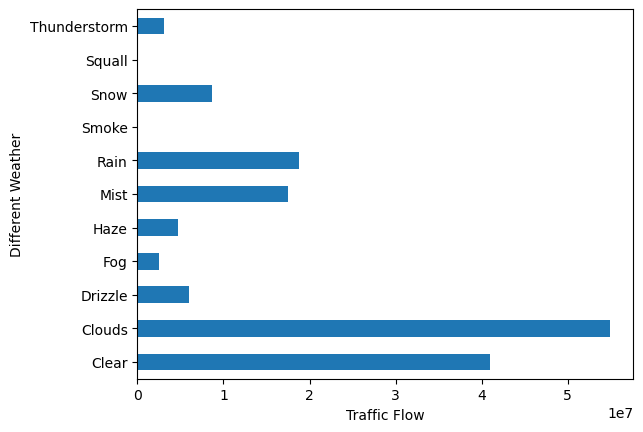

In [43]:
dataset.groupby(['weather_main'])['traffic_volume'].sum().plot.barh()
plt.xlabel('Traffic Flow')
plt.ylabel("Different Weather")
plt.show()


In [44]:
#finding and displaying any missing or null values
dataset.isnull().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [45]:
#applying label encoder to convert all non-numeric data to numeric values
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
dataset['weather_main'] = pd.Series(encoder1.fit_transform(dataset['weather_main'].astype(str)))#encode all str columns to numeric 
dataset['weather_description'] = pd.Series(encoder2.fit_transform(dataset['weather_description'].astype(str)))#encode all str columns to numeric
dataset

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0         NaN  288.28      0.0      0.0          40             1   
1         NaN  289.36      0.0      0.0          75             1   
2         NaN  289.58      0.0      0.0          90             1   
3         NaN  290.13      0.0      0.0          90             1   
4         NaN  291.14      0.0      0.0          75             1   
...       ...     ...      ...      ...         ...           ...   
48199     NaN  283.45      0.0      0.0          75             1   
48200     NaN  282.76      0.0      0.0          90             1   
48201     NaN  282.73      0.0      0.0          90            10   
48202     NaN  282.09      0.0      0.0          90             1   
48203     NaN  282.12      0.0      0.0          90             1   

       weather_description            date_time  traffic_volume  
0                       24  2012-10-02 09:00:00            5545  
1                        2  2012-10-02 10:00:00            4516  
2                       19  2012-10-02 11:00:00            4767  
3                       19  2012-10-02 12:00:00            5026  
4                        2  2012-10-02 13:00:00            4918  
...                    ...                  ...             ...  
48199                    2  2018-09-30 19:00:00            3543  
48200                   19  2018-09-30 20:00:00            2781  
48201                   21  2018-09-30 21:00:00            2159  
48202                   19  2018-09-30 22:00:00            1450  
48203                   19  2018-09-30 23:00:00             954  

[48204 rows x 9 columns]

In [46]:
#now convert date column as numeric features by separting them into year, month, day, hour, second and minutes
dataset['date_time'] = pd.to_datetime(dataset['date_time'])
dataset['year'] = dataset['date_time'].dt.year
dataset['month'] = dataset['date_time'].dt.month
dataset['day'] = dataset['date_time'].dt.day
dataset['hour'] = dataset['date_time'].dt.hour
dataset['minute'] = dataset['date_time'].dt.minute
dataset['second'] = dataset['date_time'].dt.second
Y = dataset['traffic_volume'].ravel()
Y = Y.reshape(-1, 1)
dataset.drop(['holiday','date_time','traffic_volume'], axis = 1,inplace=True)
dataset

temp  rain_1h  snow_1h  clouds_all  weather_main  \
0      288.28      0.0      0.0          40             1   
1      289.36      0.0      0.0          75             1   
2      289.58      0.0      0.0          90             1   
3      290.13      0.0      0.0          90             1   
4      291.14      0.0      0.0          75             1   
...       ...      ...      ...         ...           ...   
48199  283.45      0.0      0.0          75             1   
48200  282.76      0.0      0.0          90             1   
48201  282.73      0.0      0.0          90            10   
48202  282.09      0.0      0.0          90             1   
48203  282.12      0.0      0.0          90             1   

       weather_description  year  month  day  hour  minute  second  
0                       24  2012     10    2     9       0       0  
1                        2  2012     10    2    10       0       0  
2                       19  2012     10    2    11       0       0  
3                       19  2012     10    2    12       0       0  
4                        2  2012     10    2    13       0       0  
...                    ...   ...    ...  ...   ...     ...     ...  
48199                    2  2018      9   30    19       0       0  
48200                   19  2018      9   30    20       0       0  
48201                   21  2018      9   30    21       0       0  
48202                   19  2018      9   30    22       0       0  
48203                   19  2018      9   30    23       0       0  

[48204 rows x 12 columns]

In [47]:
#extract training features from dataset and then normalize and split into train and test
X = dataset.values #get training features from dataset
sc1 = MinMaxScaler(feature_range = (0, 1))
sc2 = MinMaxScaler(feature_range = (0, 1))
X = sc1.fit_transform(X)#normalize train features
Y = sc2.fit_transform(Y)
X = X[0:2000]
Y = Y[0:2000]
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset after LIGHTGBM selection : "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))

Total records found in dataset = 2000
Total features found in dataset after LIGHTGBM selection : 12
80% dataset for training : 1600
20% dataset for testing  : 400


In [48]:
#define global variables to calculate MSE and RMSE values where MSE and RMSE refers as difference between true traffic
#values and predicted traffic values so the lower the difference the better is the model
mse = []
rmse = []

In [49]:
#function to calculate MSE and other metrics
def calculateMetrics(algorithm, predict, test_labels):
    mse_value = mean_squared_error(test_labels, predict)
    rmse_value = sqrt(mse_value)
    predict = sc2.inverse_transform(predict)
    test_label = sc2.inverse_transform(test_labels)
    predict = predict.ravel()
    test_label = test_label.ravel()
    predict = predict[0:200]
    test_label = test_label[0:200]
    mse.append(mse_value)
    rmse.append(rmse_value)
    print(algorithm+" MSE  : "+str(mse_value))
    print(algorithm+" RMSE : "+str(rmse_value))
    print()
    for i in range(0, 20):
        print("True Traffic Volume : "+str(test_label[i])+" Predicted Traffic Volume : "+str(predict[i]))
    plt.plot(test_label, color = 'red', label = 'Original Traffic Flow')
    plt.plot(predict, color = 'green', label = 'Predicted Traffic Flow')
    plt.title(algorithm+' Traffic Flow Prediction')
    plt.xlabel('Test Data')
    plt.ylabel('Predicted Traffic Flow')
    plt.legend()
    plt.show()

Decision Tree MSE  : 0.018145371336911763
Decision Tree RMSE : 0.1347047561777674

True Traffic Volume : 4719.0 Predicted Traffic Volume : 4573.14146341463
True Traffic Volume : 5073.0 Predicted Traffic Volume : 4573.14146341463
True Traffic Volume : 2769.0 Predicted Traffic Volume : 1901.4999999999993
True Traffic Volume : 5490.0 Predicted Traffic Volume : 5477.497435897439
True Traffic Volume : 1007.0000000000001 Predicted Traffic Volume : 1398.1999999999991
True Traffic Volume : 730.0 Predicted Traffic Volume : 500.58461538461535
True Traffic Volume : 6222.0 Predicted Traffic Volume : 5477.497435897439
True Traffic Volume : 537.0 Predicted Traffic Volume : 369.870503597122
True Traffic Volume : 798.0 Predicted Traffic Volume : 656.5652173913043
True Traffic Volume : 5981.0 Predicted Traffic Volume : 4573.14146341463
True Traffic Volume : 2638.0 Predicted Traffic Volume : 2346.96
True Traffic Volume : 1512.0 Predicted Traffic Volume : 1398.1999999999991
True Traffic Volume : 2643.0 P

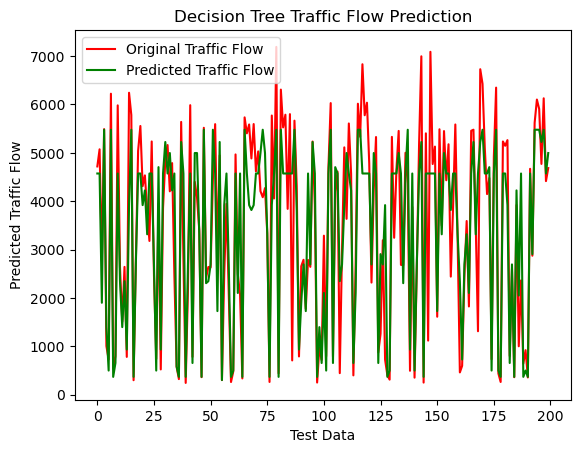

In [50]:
#train decisoon tree algorithm by tuning its parameters
tuning_param = {'criterion' : ('squared_error', 'absolute_error'), 'max_depth' : (2, 5)}
dt_cls = DecisionTreeRegressor() #creasting decision tree object
tuned_dt = GridSearchCV(dt_cls, tuning_param, cv=5)#defining decision tree with tuned parameters
tuned_dt.fit(X_train, y_train.ravel())#now train decision tree
predict = tuned_dt.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Decision Tree", predict, y_test) #evaluate Decision Tree model by calling caculate metrics function

SVM MSE  : 0.026260127138951362
SVM RMSE : 0.16204976747577074

True Traffic Volume : 4719.0 Predicted Traffic Volume : 4698.677548000844
True Traffic Volume : 5073.0 Predicted Traffic Volume : 5029.866306156275
True Traffic Volume : 2769.0 Predicted Traffic Volume : 2300.612476699768
True Traffic Volume : 5490.0 Predicted Traffic Volume : 5110.7137135018675
True Traffic Volume : 1007.0000000000001 Predicted Traffic Volume : 1141.062109180288
True Traffic Volume : 730.0 Predicted Traffic Volume : 410.73576149499667
True Traffic Volume : 6222.0 Predicted Traffic Volume : 5270.671037423295
True Traffic Volume : 537.0 Predicted Traffic Volume : 907.5291310014211
True Traffic Volume : 798.0 Predicted Traffic Volume : 2123.721357921375
True Traffic Volume : 5981.0 Predicted Traffic Volume : 3963.326368970162
True Traffic Volume : 2638.0 Predicted Traffic Volume : 2260.422041064903
True Traffic Volume : 1512.0 Predicted Traffic Volume : 1537.1740708416592
True Traffic Volume : 2643.0 Predict

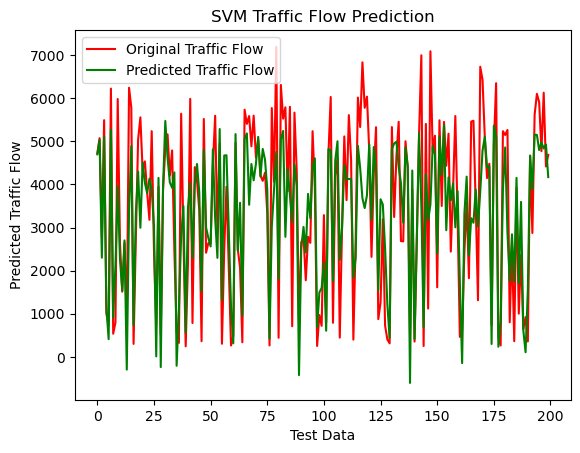

In [51]:
#train SVM algorithm by tuning its parameters
tuning_param = {'kernel' : ('linear', 'rbf'), 'gamma' : ('auto','scale')}
svm_cls = svm.SVR() #creasting SVM object
tuned_svm = GridSearchCV(svm_cls, tuning_param, cv=5)#defining svm with tuned parameters
tuned_svm.fit(X_train, y_train.ravel())#now train SVM
predict = tuned_svm.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("SVM", predict, y_test) #evaluate SVM model by calling caculate metrics function

Random Forest MSE  : 0.008918756483686303
Random Forest RMSE : 0.09443916816494258

True Traffic Volume : 4719.0 Predicted Traffic Volume : 5197.32
True Traffic Volume : 5073.0 Predicted Traffic Volume : 4589.52
True Traffic Volume : 2769.0 Predicted Traffic Volume : 1452.0999999999995
True Traffic Volume : 5490.0 Predicted Traffic Volume : 5113.72
True Traffic Volume : 1007.0000000000001 Predicted Traffic Volume : 2141.1000000000004
True Traffic Volume : 730.0 Predicted Traffic Volume : 766.1599999999999
True Traffic Volume : 6222.0 Predicted Traffic Volume : 5643.239999999999
True Traffic Volume : 537.0 Predicted Traffic Volume : 739.6799999999997
True Traffic Volume : 798.0 Predicted Traffic Volume : 671.7800000000001
True Traffic Volume : 5981.0 Predicted Traffic Volume : 4907.260000000002
True Traffic Volume : 2638.0 Predicted Traffic Volume : 1956.6199999999997
True Traffic Volume : 1512.0 Predicted Traffic Volume : 1984.2199999999998
True Traffic Volume : 2643.0 Predicted Traffi

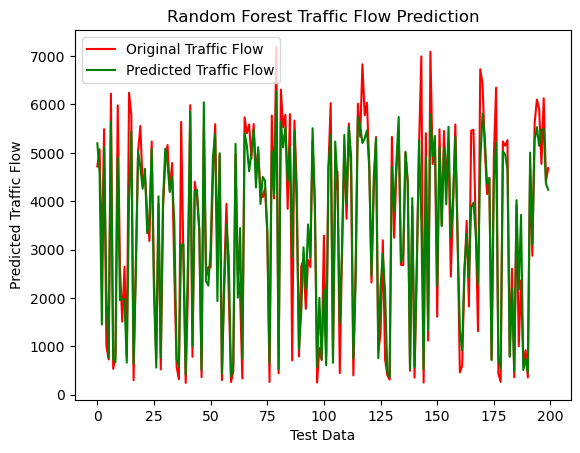

In [52]:
#train RandomForest algorithm by tuning its parameters
tuning_param = {'n_estimators' : (20, 50, 100), 'max_features' : ('sqrt','log2')}
rf_cls = RandomForestRegressor() #creasting random Forest object
tuned_rf = GridSearchCV(rf_cls, tuning_param, cv=5)#defining RF with tuned parameters
tuned_rf.fit(X_train, y_train.ravel())#now train Random Forest
predict = tuned_rf.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Random Forest", predict, y_test) #evaluate Random Forest model by calling caculate metrics function

Bayesian Ridge MSE  : 0.0689480650699279
Bayesian Ridge RMSE : 0.2625796356725477

True Traffic Volume : 4719.0 Predicted Traffic Volume : 3141.6229090095135
True Traffic Volume : 5073.0 Predicted Traffic Volume : 3429.308204149745
True Traffic Volume : 2769.0 Predicted Traffic Volume : 2695.242472023339
True Traffic Volume : 5490.0 Predicted Traffic Volume : 3579.6998155411798
True Traffic Volume : 1007.0000000000001 Predicted Traffic Volume : 4115.703162122822
True Traffic Volume : 730.0 Predicted Traffic Volume : 2231.9967105939068
True Traffic Volume : 6222.0 Predicted Traffic Volume : 3860.278740676677
True Traffic Volume : 537.0 Predicted Traffic Volume : 2290.840460024642
True Traffic Volume : 798.0 Predicted Traffic Volume : 2816.087986538172
True Traffic Volume : 5981.0 Predicted Traffic Volume : 2904.7582506868243
True Traffic Volume : 2638.0 Predicted Traffic Volume : 2531.6923955073144
True Traffic Volume : 1512.0 Predicted Traffic Volume : 4267.876957218193
True Traffic Vo

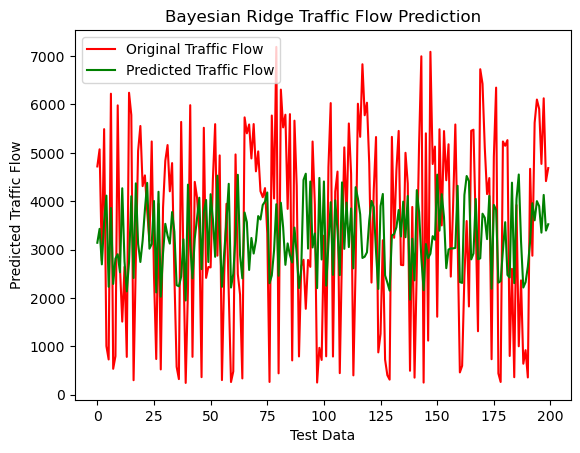

In [53]:
#train Bayesian Ridge algorithm by tuning its parameters
tuning_param = {'fit_intercept' : (True, False), 'tol' : (0.0001, 0.001)}
br_cls = BayesianRidge() #creasting BayesianRidge object
tuned_br = GridSearchCV(br_cls, tuning_param, cv=5)#defining BR with tuned parameters
tuned_br.fit(X_train, y_train.ravel())#now train Bayesian Ridge
predict = tuned_br.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Bayesian Ridge", predict, y_test) #evaluate Bayesian Ridge model by calling caculate metrics function

13/13 [==============================] - 2s 10ms/step
LSTM MSE  : 0.030069147449912716
LSTM RMSE : 0.17340457736147774

True Traffic Volume : 4719.0 Predicted Traffic Volume : 5040.992
True Traffic Volume : 5073.0 Predicted Traffic Volume : 4813.696
True Traffic Volume : 2769.0 Predicted Traffic Volume : 3556.3567
True Traffic Volume : 5490.0 Predicted Traffic Volume : 4767.6196
True Traffic Volume : 1007.0000000000001 Predicted Traffic Volume : 1566.3129
True Traffic Volume : 730.0 Predicted Traffic Volume : 326.51297
True Traffic Volume : 6222.0 Predicted Traffic Volume : 4923.1426
True Traffic Volume : 537.0 Predicted Traffic Volume : 1106.9707
True Traffic Volume : 798.0 Predicted Traffic Volume : 2719.294
True Traffic Volume : 5981.0 Predicted Traffic Volume : 3823.6833
True Traffic Volume : 2638.0 Predicted Traffic Volume : 1044.6907
True Traffic Volume : 1512.0 Predicted Traffic Volume : 1615.1753
True Traffic Volume : 2643.0 Predicted Traffic Volume : 2182.1519
True Traffic Vol

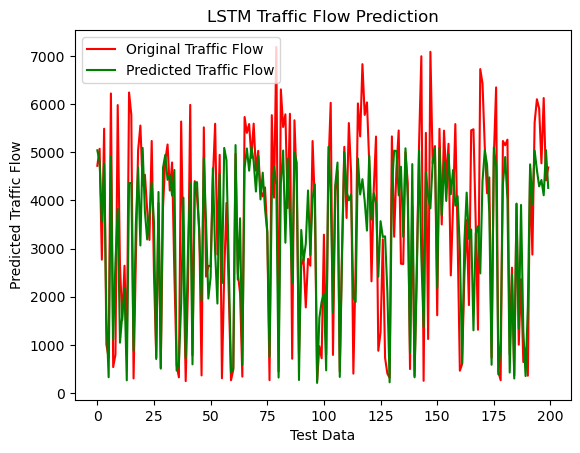

In [54]:
#now train LSTM algorithm
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Now train LSTM with tuning parameters
lstm = Sequential()
#creating LSTM layer with 50 neurons for data optimizations
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], X_train1.shape[2])))
#dropout layer to remove irrelevant features
lstm.add(Dropout(0.2))
#adding another layer
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units = 50))
lstm.add(Dropout(0.2))
#defining output layer
lstm.add(Dense(units = 1))
#compile and train the model
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists('model/lstm_weights.hdf5') == False:
    model_check_point = ModelCheckpoint(filepath='model/lstm_weights.hdf5', verbose = 1, save_best_only = True)
    lstm.fit(X_train1, y_train, epochs = 30, batch_size = 32, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    lstm = load_model('model/lstm_weights.hdf5')
#perform prediction on test data    
predict = lstm.predict(X_test1)
calculateMetrics("LSTM", predict, y_test)#evaluate LSTM model in terms of MSE and RMSE

13/13 [==============================] - 0s 1ms/step
CNN MSE  : 0.017350883301689594
CNN RMSE : 0.13172275164788197

True Traffic Volume : 4719.0 Predicted Traffic Volume : 4669.3774
True Traffic Volume : 5073.0 Predicted Traffic Volume : 4936.355
True Traffic Volume : 2769.0 Predicted Traffic Volume : 2324.3193
True Traffic Volume : 5490.0 Predicted Traffic Volume : 5307.482
True Traffic Volume : 1007.0000000000001 Predicted Traffic Volume : 1041.2391
True Traffic Volume : 730.0 Predicted Traffic Volume : 685.7659
True Traffic Volume : 6222.0 Predicted Traffic Volume : 5248.7354
True Traffic Volume : 537.0 Predicted Traffic Volume : 314.51358
True Traffic Volume : 798.0 Predicted Traffic Volume : 514.16754
True Traffic Volume : 5981.0 Predicted Traffic Volume : 4798.4243
True Traffic Volume : 2638.0 Predicted Traffic Volume : 2220.3223
True Traffic Volume : 1512.0 Predicted Traffic Volume : 1126.1847
True Traffic Volume : 2643.0 Predicted Traffic Volume : 2181.9788
True Traffic Volume

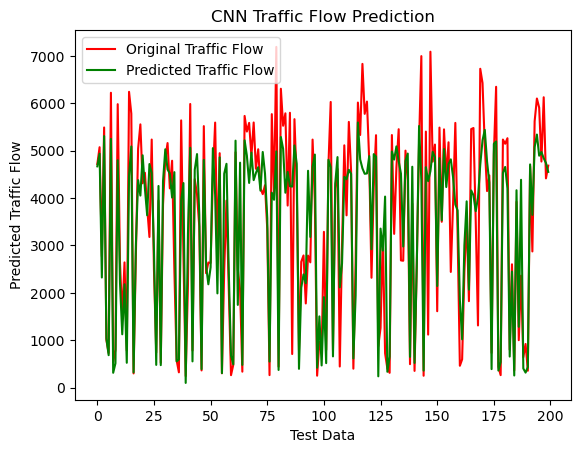

In [55]:
#train CNN algorithm with tuning layers
X_train1 = X_train.reshape(X_train.shape[0],X_train.shape[1], 1, 1)
X_test1 = X_test.reshape(X_test.shape[0],X_test.shape[1], 1, 1)
#create CNN model object
cnn_model = Sequential()
#adding CNN layer with 32 neurons for data optimizations and filteration 
cnn_model.add(Conv2D(32, (1, 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
#max layer to collect relevant data from CNN layer and ignore irrelevant features
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
#defining another CNN layer for further data optimizations
cnn_model.add(Conv2D(16, (1, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Flatten())
#defining output layer
cnn_model.add(Dense(units = 28, activation = 'relu'))
cnn_model.add(Dense(units = 1))
#compile and train the model
cnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists('model/cnn_weights.hdf5') == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    cnn_model.fit(X_train1, y_train, epochs = 30, batch_size = 32, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    cnn_model = load_model('model/cnn_weights.hdf5')
#perfrom prediction on test data using CNN model    
predict = cnn_model.predict(X_test1)
#evaluate cnn model performnace using predicted and true traffic volume
calculateMetrics("CNN", predict, y_test)

In [57]:
#reading test data from test file and then predicting traffic volume
dataset = pd.read_csv("testData.csv")
dataset.fillna(0, inplace = True) #remove missing values
temp = dataset.values
dataset['date_time'] = pd.to_datetime(dataset['date_time'])#convert column to date time
dataset['year'] = dataset['date_time'].dt.year #converting date into year, month
dataset['month'] = dataset['date_time'].dt.month
dataset['day'] = dataset['date_time'].dt.day
dataset['hour'] = dataset['date_time'].dt.hour
dataset['minute'] = dataset['date_time'].dt.minute
dataset['second'] = dataset['date_time'].dt.second
#converting non-numeric into numeric data
dataset['weather_main'] = pd.Series(encoder1.fit_transform(dataset['weather_main'].astype(str)))#encode all str columns to numeric 
dataset['weather_description'] = pd.Series(encoder2.transform(dataset['weather_description'].astype(str)))#encode all str columns to numeric
dataset.drop(['holiday','date_time'], axis = 1,inplace=True)
testData = dataset.values
#normalizing test data
testData = sc1.transform(testData)
#perform prediction on test
predict = tuned_rf.predict(testData)
#reshaping and denormalize predicted output
predict = predict.reshape(-1, 1)
predict = sc2.inverse_transform(predict)
for i in range(len(predict)):#now loop each test data and then predict traffic volume
    print("Test Data = "+str(temp[i]))
    print("Predicted Traffic Volume ====> "+str(predict[i,0]))
    print()

Test Data = [0.0 282.06 0.0 0.0 90 'Clouds' 'overcast clouds' '2023-09-11 19:00:00']
Predicted Traffic Volume ====> 3491.7000000000007

Test Data = [0.0 281.95 0.0 0.0 90 'Clouds' 'overcast clouds' '2023-10-11 20:00:00']
Predicted Traffic Volume ====> 2997.76

Test Data = [0.0 282.02 0.0 0.0 100 'Mist' 'mist' '2023-10-20 10:00:00']
Predicted Traffic Volume ====> 3917.0799999999977

Test Data = [0.0 282.02 0.0 0.0 100 'Rain' 'moderate rain' '2023-10-20 10:00:00']
Predicted Traffic Volume ====> 3940.5799999999977

Test Data = [0.0 268.45 0.0 0.0 20 'Clouds' 'few clouds' '2023-11-01 08:00:00']
Predicted Traffic Volume ====> 5086.379999999999

Test Data = [0.0 270.9 0.0 0.0 1 'Clear' 'sky is clear' '2023-11-01 09:00:00']
Predicted Traffic Volume ====> 5295.6399999999985

Test Data = [0.0 275.71 0.0 0.0 90 'Mist' 'mist' '2023-12-16 03:00:00']
Predicted Traffic Volume ====> 575.46

Test Data = [0.0 275.71 0.0 0.0 90 'Rain' 'light rain' '2023-12-16 03:00:00']
Predicted Traffic Volume ====> 56

In [58]:
#showing all algorithms with scenario A and B performance values
columns = ["Algorithm Name","MSE","RMSE"]
values = []
algorithm_names = ["Decision Tree", "SVM","Random Forest", "Bayesian Ridge","LSTM","CNN"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],mse[i],rmse[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

Algorithm Name       MSE      RMSE
0   Decision Tree  0.018145  0.134705
1             SVM  0.026260  0.162050
2   Random Forest  0.008919  0.094439
3  Bayesian Ridge  0.068948  0.262580
4            LSTM  0.030069  0.173405
5             CNN  0.017351  0.131723

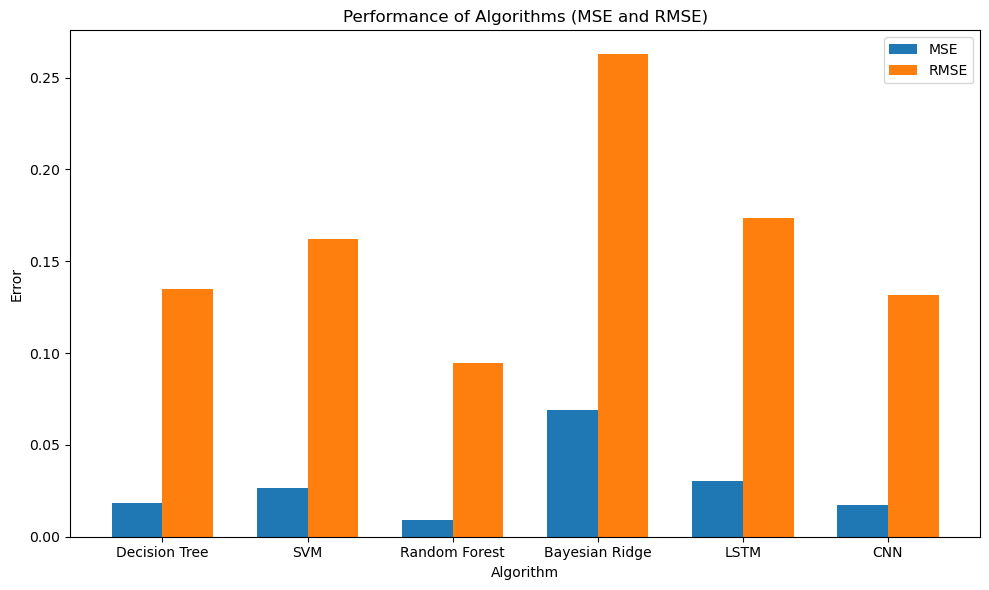

In [59]:
algorithm_names = ["Decision Tree", "SVM","Random Forest", "Bayesian Ridge","LSTM","CNN"]
bar_width = 0.35
index = np.arange(len(algorithm_names))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, mse, bar_width, label='MSE')
plt.bar(index + bar_width, rmse, bar_width, label='RMSE')

# Adding labels and title
plt.xlabel('Algorithm')
plt.ylabel('Error')
plt.title('Performance of Algorithms (MSE and RMSE)')
plt.xticks(index + bar_width / 2, algorithm_names)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [60]:
#showing all algorithms with scenario A and B performance values
columns = ["Algorithm Name","MSE","RMSE"]
values = []
algorithm_names = ["Decision Tree", "SVM","Random Forest", "Bayesian Ridge","LSTM", "CNN"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],mse[i],rmse[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

Algorithm Name       MSE      RMSE
0   Decision Tree  0.018145  0.134705
1             SVM  0.026260  0.162050
2   Random Forest  0.008919  0.094439
3  Bayesian Ridge  0.068948  0.262580
4            LSTM  0.030069  0.173405
5             CNN  0.017351  0.131723

In [61]:
#reading test data from test file and then predicting traffic volume
dataset = pd.read_csv("testData.csv")
dataset.fillna(0, inplace = True) #remove missing values
temp = dataset.values
dataset['date_time'] = pd.to_datetime(dataset['date_time'])#convert column to date time
dataset['year'] = dataset['date_time'].dt.year #converting date into year, month
dataset['month'] = dataset['date_time'].dt.month
dataset['day'] = dataset['date_time'].dt.day
dataset['hour'] = dataset['date_time'].dt.hour
dataset['minute'] = dataset['date_time'].dt.minute
dataset['second'] = dataset['date_time'].dt.second
#converting non-numeric into numeric data
dataset['weather_main'] = pd.Series(encoder1.fit_transform(dataset['weather_main'].astype(str)))#encode all str columns to numeric 
dataset['weather_description'] = pd.Series(encoder2.transform(dataset['weather_description'].astype(str)))#encode all str columns to numeric
dataset.drop(['holiday','date_time'], axis = 1,inplace=True)
testData = dataset.values
#normalizing test data
testData = sc1.transform(testData)
#perform prediction on test
predict = tuned_rf.predict(testData)
#reshaping and denormalize predicted output
predict = predict.reshape(-1, 1)
predict = sc2.inverse_transform(predict)
for i in range(len(predict)):#now loop each test data and then predict traffic volume
    print("Test Data = "+str(temp[i]))
    print("Predicted Traffic Volume ====> "+str(predict[i,0]))
    print()

Test Data = [0.0 282.06 0.0 0.0 90 'Clouds' 'overcast clouds' '2023-09-11 19:00:00']
Predicted Traffic Volume ====> 3491.7000000000007

Test Data = [0.0 281.95 0.0 0.0 90 'Clouds' 'overcast clouds' '2023-10-11 20:00:00']
Predicted Traffic Volume ====> 2997.76

Test Data = [0.0 282.02 0.0 0.0 100 'Mist' 'mist' '2023-10-20 10:00:00']
Predicted Traffic Volume ====> 3917.0799999999977

Test Data = [0.0 282.02 0.0 0.0 100 'Rain' 'moderate rain' '2023-10-20 10:00:00']
Predicted Traffic Volume ====> 3940.5799999999977

Test Data = [0.0 268.45 0.0 0.0 20 'Clouds' 'few clouds' '2023-11-01 08:00:00']
Predicted Traffic Volume ====> 5086.379999999999

Test Data = [0.0 270.9 0.0 0.0 1 'Clear' 'sky is clear' '2023-11-01 09:00:00']
Predicted Traffic Volume ====> 5295.6399999999985

Test Data = [0.0 275.71 0.0 0.0 90 'Mist' 'mist' '2023-12-16 03:00:00']
Predicted Traffic Volume ====> 575.46

Test Data = [0.0 275.71 0.0 0.0 90 'Rain' 'light rain' '2023-12-16 03:00:00']
Predicted Traffic Volume ====> 56